# KBinsDiscretizer

## About KBinsDiscretizer

`KBinsDiscretizer` adalah alat preprocessing dalam *data mining* yang mengubah fitur numerik kontinu menjadi **interval diskrit (bin)**.
Teknik ini termasuk dalam *feature engineering* dan sangat berguna untuk menangani hubungan non-linear dalam data.

### 1. Basic Concepts
- **Tujuan**: Mengonversi nilai kontinu (misal: usia, harga) menjadi kategori diskrit (misal: usia[0-20], [21-40], [41-60]).
- **Analog**: Seperti mengelompokkan nilai ujian menjadi kategori A, B, C.
- **Manfaat**:
  - Menangkap hubungan non-linear antara fitur dan target.
  - Mengurangi dampak *outliers* (data ekstrem).
  - Memenuhi asumsi model berbasis kategori (seperti Naive Bayes atau Decision Tree).

### 2. Main Parameters
Key parameter saat menggunakan `KBinsDiscretizer` (implementasi Scikit-Learn):
| Parameter  | Nilai/Opsi                                | Deskripsi                                                   |
|------------|-------------------------------------------|-------------------------------------------------------------|
| `n_bins`   | Integer (default=5)                       | Jumlah bin yang diinginkan per fitur.                       |
| `encode`   | `'onehot'`, `'onehot-dense'`, `'ordinal'` | Metode encoding hasil diskritisasi (mirip `OneHotEncoder`). |
| `strategy` | `'uniform'`, `'quantile'`, `'kmeans'`     | Strategi penentuan batas bin.                               |

### 3. Bin Determination Strategy
Strategi menentukan bagaimana batas interval dihitung:

- **`'uniform'` (Equal Width)**:
  - Membagi rentang nilai menjadi bin berlebar sama.
  - Cocok untuk data distribusi merata.
  - **Contoh**: Rentang 0–100 dengan `n_bins=5` → Bin: [0-20], [20-40], ..., [80-100].

- **`'quantile'` (Equal Frequency)**:
  - Setiap bin berisi jumlah data yang sama (±).
  - Cocok untuk data *skewed* atau outlier.
  - **Contoh**: 100 data, `n_bins=5` → Setiap bin berisi ~20 data.

- **`'kmeans'` (Clustering-based)**:
  - Gunakan algoritma K-Means untuk mengelompokkan nilai.
  - Batas bin ditentukan oleh pusat kluster.
  - Cocok untuk pola distribusi kompleks.

### 4. Encoding Method
Setelah diskritisasi, hasil perlu di-encode untuk model ML:
- **`'ordinal'`**:
  - Hasil: Integer (0, 1, 2, ...) yang mewakili bin.
  - Contoh: Nilai 15 → Bin 0, Nilai 25 → Bin 1.
- **`'onehot'`**:
  - Hasil: Matriks *sparse* one-hot (misal: [0, 1, 0] untuk Bin 1).
- **`'onehot-dense'`**:
  - Versi *dense* dari one-hot (bentuk array penuh).

### 5. Usage Procedure
```python
from sklearn.preprocessing import KBinsDiscretizer

# Inisialisasi
discretizer = KBinsDiscretizer(
    n_bins=3,
    encode='ordinal',
    strategy='quantile'
)

# Fitting & transform
X_binned = discretizer.fit_transform(X)
```

### 6. Applications & Best Practices
- **Use Case**:
  - Meningkatkan performa model linear (seperti Logistic Regression) dengan menambahkan non-linearitas.
  - Reduksi noise pada data sensor.
- **Peringatan**:
  - `n_bins` terlalu besar → Overfitting.
  - `n_bins` terlalu kecil → Kehilangan informasi.
- **Tips**:
  - Gunakan `strategy='quantile'` untuk data tidak seimbang.
  - Validasi dengan cross-validation untuk memilih `n_bins` optimal.
  - Kombinasikan dengan `Pipeline` untuk menghindari *data leakage*.

## Assignment To-Do

Menjelaskan proses Discretization menggunakan K-Means Clustering pada data iris,
dan lakukan dengan model Naive Bayes dan Decision Tree on data that has been Discretized and before Discretization.

### 1. Data Preparation
Pastikan pembagian data *random* untuk menghindari bias.
- Pilih dataset Iris (4 fitur numerik: `sepal_length`, `sepal_width`, `petal_length`, `petal_width`; target: spesies bunga).
- Bagi data menjadi training set & testing set (contoh: 70% training, 30% testing).

### 2. Discretization dengan K-Means Clustering
Inisialisasi `KBinsDiscretizer`:
- Parameter:
  - `strategy='kmeans'` (gunakan K-Means untuk menentukan bin).
  - `n_bins` (misal 3-5 bin per fitur, eksperimen nanti).
  - `encode='ordinal'` (hasil: angka integer mewakili bin).
- Fitting:
  - Hitung pusat kluster (centroid) untuk setiap fitur menggunakan algoritma K-Means pada training set.
  - Contoh: Fitur `petal_length` → centroid bin 1 = 1.5 cm, bin 2 = 4.0 cm, bin 3 = 5.5 cm.
- Transform:
  - Kategorikan nilai kontinu ke bin berdasarkan jarak terdekat ke centroid.
  - Contoh: `petal_length` = 4.2 cm → masuk bin 2 (karena lebih dekat ke 4.0 cm).
  - Bin tidak sama lebar, tetapi mengikuti pola alami data.
  - Hasil akhir: Setiap fitur numerik menjadi variabel kategorikal ordinal (contoh: `petal_length` → [0, 1, 2]).

### 3. Modeling *Before Discretization*
Baseline performa tanpa proses discretization

Naive Bayes (GaussianNB):
   - Asumsi: Data kontinu berdistribusi normal.
   - Latih model pada data asli (4 fitur numerik).
   - Evaluasi akurasi di testing set.

Decision Tree:
   - Latih model pada data asli (split node berdasarkan nilai kontinu).
   - Evaluasi akurasi di testing set.

### 4. Modeling *After Discretization*
Model Naive Bayes harus diubah dari GaussianNB ke `CategoricalNB` karena tipe data berubah!

Naive Bayes (CategoricalNB):
   - Ubah tipe model: Gunakan CategoricalNB (dirancang untuk fitur diskret/kategorikal).
   - Latih model pada data hasil discretization.
   - Evaluasi akurasi di testing set.

Decision Tree:
   - Latih model yang sama pada data diskret.
   - Splitting criterion (misal: Gini/Entropy) bekerja pada frekuensi kategori.
   - Evaluasi akurasi di testing set.

### 5. Evaluation & Comparison
  1. Hitung metrik performa:
     - Akurasi, Precision, Recall (fokus pada akurasi untuk simplifikasi).
  2. Bandingkan hasil:
     - Naive Bayes: Before vs. After discretization.  
     - Decision Tree: Before vs. After discretization.  
  3. Analisis:  
     - Apakah discretization meningkatkan akurasi?  
     - Model mana yang paling diuntungkan?  
     - Mengapa bisa terjadi (lihat karakteristik model)?   
  - Naive Bayes:  
    - Before: Asumsi normal mungkin tidak terpenuhi.  
    - After: Data diskret lebih sesuai dengan multinomial distribution.  
  - Decision Tree:  
    - Before: Split pada nilai kontinu (misal: `petal_length < 2.45`).  
    - After: Split berdasarkan kategori bin (misal: `petal_length_bin == 1`).  

## Data Mining Process (`CRISP-DM`)

### 1. Business Understanding

- **Tujuan Utama**:
  - Mengevaluasi pengaruh diskritisasi berbasis K-Means terhadap performa model klasifikasi (Naive Bayes & Decision Tree).
  - Menentukan apakah transformasi data diskrit meningkatkan akurasi prediksi spesies bunga iris.
- **Kriteria Kesuksesan**:
  - Akurasi model setelah diskritisasi > akurasi model baseline (data kontinu).

#### 1.1 **Define the Problem**
*"Bagaimana pengaruh teknik diskritisasi berbasis K-Means terhadap akurasi klasifikasi spesies bunga Iris menggunakan model Naive Bayes dan Decision Tree?"*

#### 1.2 **Objectives**
1. Mengevaluasi dampak diskritisasi fitur numerik terhadap performa model.
2. Membandingkan akurasi model pada data kontinu vs. diskret.
3. Menentukan apakah diskritisasi K-Means cocok untuk dataset Iris.

#### 1.3 **Stakeholders & Needs**
| Stakeholder        | Ekspektasi                                                         |
|--------------------|--------------------------------------------------------------------|
| **Data Scientist** | Memahami kondisi dimana diskritisasi meningkatkan performa model.  |
| **Dosen**          | Validasi pemahaman konsep preprocessing dan pemodelan.             |
| **Peneliti Botani**| Metode akurat untuk identifikasi spesies berbasis fitur morfologi. |

#### 1.4 **Success Criteria**
- **Technical**:
  - Akurasi model setelah diskritisasi meningkat ≥ 3% dibanding baseline (data kontinu).
- **Business**:
  - Rekomendasi praktis: "Gunakan diskritisasi jika pakai Naive Bayes, pertahankan data kontinu untuk Decision Tree".

### 2. Data Understanding

- **Aktivitas**:
  - Eksplorasi dataset Iris:
    - Jumlah fitur (4 numerik: sepal/petal length/width).
    - Jumlah kelas target (3 spesies: setosa, versicolor, virginica).
    - Distribusi data (statistik deskriptif, deteksi outlier).
  - Visualisasi:
    - Scatter plot antar-fiturnya.
    - Histogram distribusi tiap fitur.
- **Tools**:
  - Pandas profiling, Matplotlib/Seaborn.

In [685]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Konfigurasi tampilan
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

#### **A. Collect Data**

- Memuat data dari kedua sumber (MySQL dan PostgreSQL)
- Mengecek struktur dasar: dimensi data dan sampel awal
- **CRISP-DM Compliance**: Memvalidasi sumber data dan format

In [686]:
df_mysql = pd.read_csv("data/iris_mysql.csv")
df_postgre = pd.read_csv("data/iris-postgre.csv")

print("=== MySQL Dataset ===")
display(df_mysql.head())
df_mysql.info()

=== MySQL Dataset ===


,id,Class,petal length,petal width
0,1,Iris-setosa,1.4,0.2
1,2,Iris-setosa,1.4,0.2
2,3,Iris-setosa,1.3,0.2
3,4,Iris-setosa,1.5,0.2
4,5,Iris-setosa,1.4,0.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   Class         150 non-null    object 
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.8+ KB


In [687]:
print("\n=== PostgreSQL Dataset ===")
display(df_postgre.head())
df_postgre.info()


=== PostgreSQL Dataset ===


,id,Class,sepal length,sepal width
0,1,Iris-setosa,5.1,3.5
1,2,Iris-setosa,4.9,3.0
2,3,Iris-setosa,4.7,3.2
3,4,Iris-setosa,4.6,3.1
4,5,Iris-setosa,5.0,3.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   Class         150 non-null    object 
 2   sepal length  150 non-null    float64
 3   sepal width   150 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.8+ KB


#### **B. Describe Data**

- Statistik deskriptif lengkap: mean, std, min/max, IQR
- **CRISP-DM Compliance**: Menggunakan `describe()` untuk summary statistik

In [688]:
def descriptive_analysis(df, name):
    print(f"\nStatistik Deskriptif ({name}):")

    num_cols = df.select_dtypes(include=np.number).columns
    if len(num_cols) > 0:
        display(df[num_cols].describe().T.assign(
            IQR = lambda x: x['75%'] - x['25%'],
            CV = lambda x: x['std'] / x['mean']  # Koefisien variasi
        ).style.background_gradient(cmap='Blues'))

    cat_cols = df.select_dtypes(include='object').columns
    if len(cat_cols) > 0:
        print("\nDistribusi Kategorikal:")
        for col in cat_cols:
            display(df[col].value_counts().to_frame().style.bar(color='skyblue'))

In [689]:
descriptive_analysis(df_mysql, "MySQL")


Statistik Deskriptif (MySQL):


,count,mean,std,min,25%,50%,75%,max,IQR,CV
id,150.000000,75.500000,43.445368,1.000000,38.250000,75.500000,112.750000,150.000000,74.500000,0.575435
petal length,150.000000,3.758667,1.764420,1.000000,1.600000,4.350000,5.100000,6.900000,3.500000,0.469427
petal width,150.000000,1.198667,0.763161,0.100000,0.300000,1.300000,1.800000,2.500000,1.500000,0.636675



Distribusi Kategorikal:


,count
Class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [690]:
descriptive_analysis(df_postgre, "PostgreSQL")


Statistik Deskriptif (PostgreSQL):


,count,mean,std,min,25%,50%,75%,max,IQR,CV
id,150.000000,75.500000,43.445368,1.000000,38.250000,75.500000,112.750000,150.000000,74.500000,0.575435
sepal length,150.000000,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000,1.300000,0.141711
sepal width,150.000000,3.054000,0.433594,2.000000,2.800000,3.000000,3.300000,4.400000,0.500000,0.141976



Distribusi Kategorikal:


,count
Class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


#### **C. Explore Data**

1. **Distribusi Fitur**:
   - Histogram + KDE untuk melihat bentuk distribusi
   - Garis mean/median untuk identifikasi skewness
2. **Outlier Detection**:
   - Boxplot visual untuk identifikasi titik ekstrem
3. **Hubungan Antar Fitur**:
   - Pairplot dengan coloring berdasarkan spesies
   - Heatmap korelasi numerik
4. **Analisis Multivariat**:
   - Scatter matrix untuk interaksi fitur

In [691]:
def plot_distributions(df, name):
    print(f"\nVisualisasi Distribusi ({name}):")

    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    if not num_cols:
        print("Tidak ada kolom numerik untuk divisualisasikan")
        return

    n_cols = min(3, len(num_cols))
    n_rows = int(np.ceil(len(num_cols) / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, col in enumerate(num_cols):
        ax = axes[i]
        sns.histplot(df[col], kde=True, ax=ax, color='skyblue')
        ax.set_title(f'Distribusi {col}')
        ax.axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
        ax.axvline(df[col].median(), color='green', linestyle='-', label='Median')
        ax.legend()

    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[num_cols], orient='h', palette='Set2')
    plt.title(f'Boxplot Fitur Numerik ({name})')
    plt.show()

    cat_cols = df.select_dtypes(include='object').columns
    if len(cat_cols) > 0:
        for col in cat_cols:
            plt.figure(figsize=(8, 4))
            sns.countplot(data=df, x=col, palette='viridis')
            plt.title(f'Distribusi {col}')
            plt.xticks(rotation=45)
            plt.show()


Visualisasi Distribusi (MySQL):


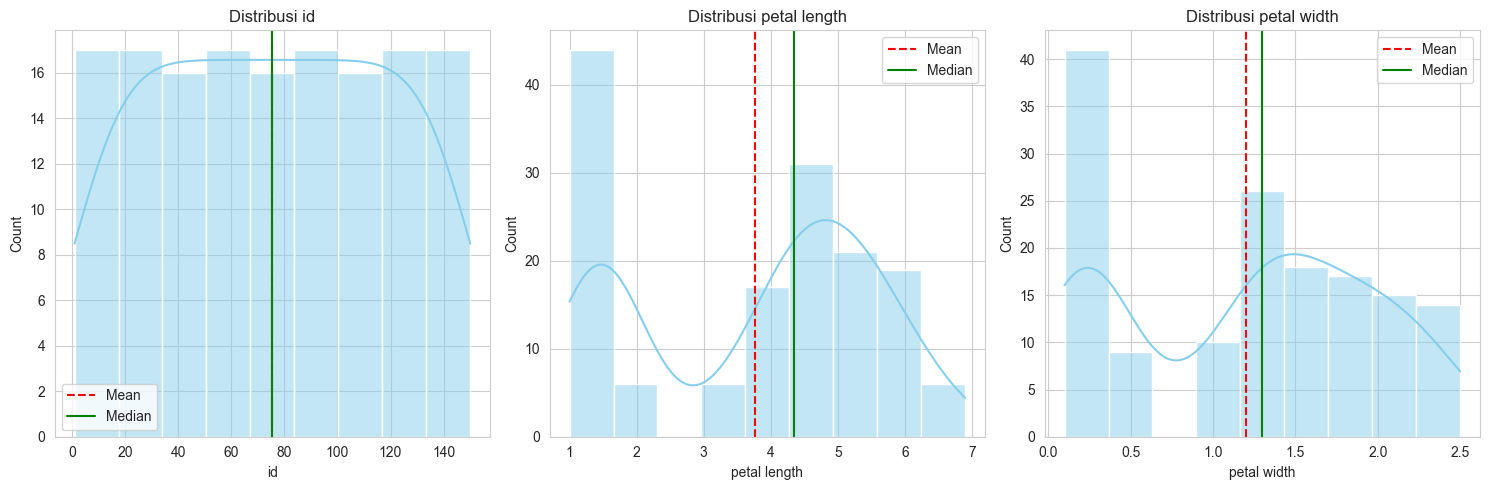

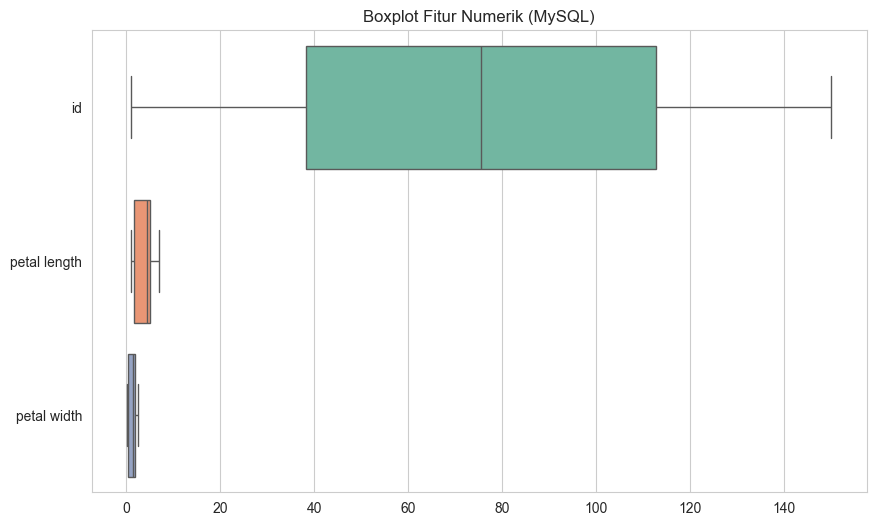

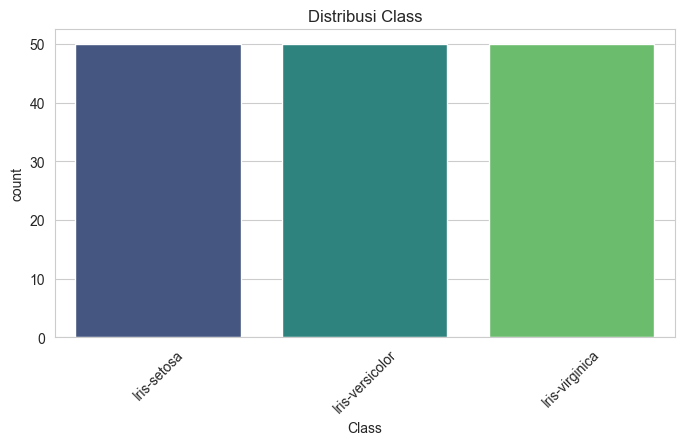

In [692]:
plot_distributions(df_mysql, "MySQL")


Visualisasi Distribusi (PostgreSQL):


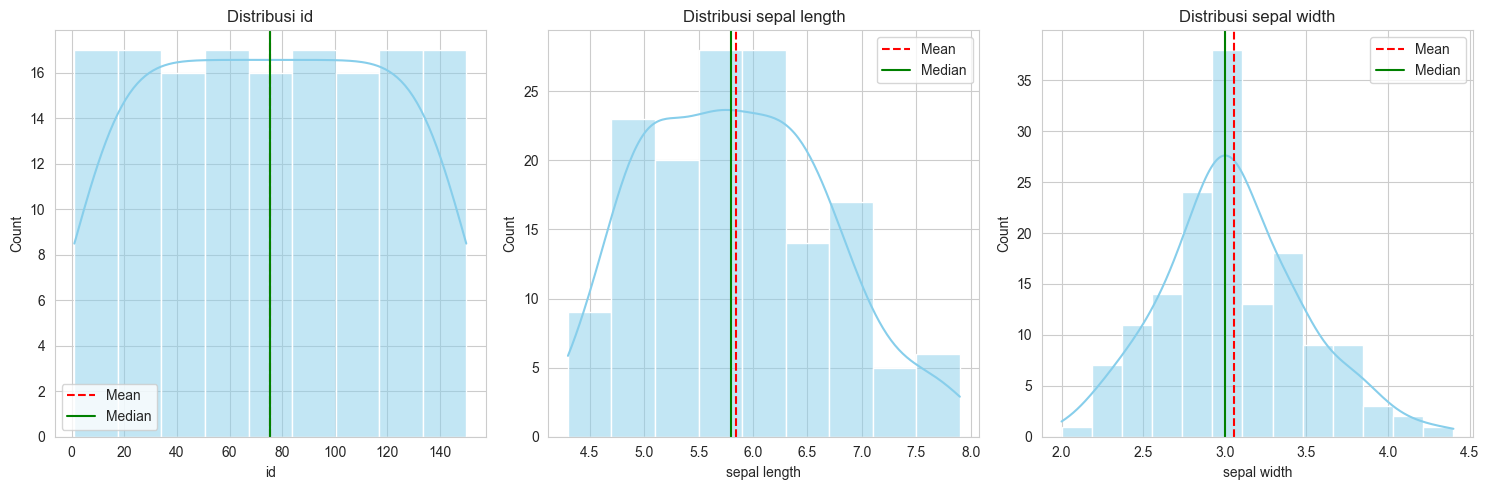

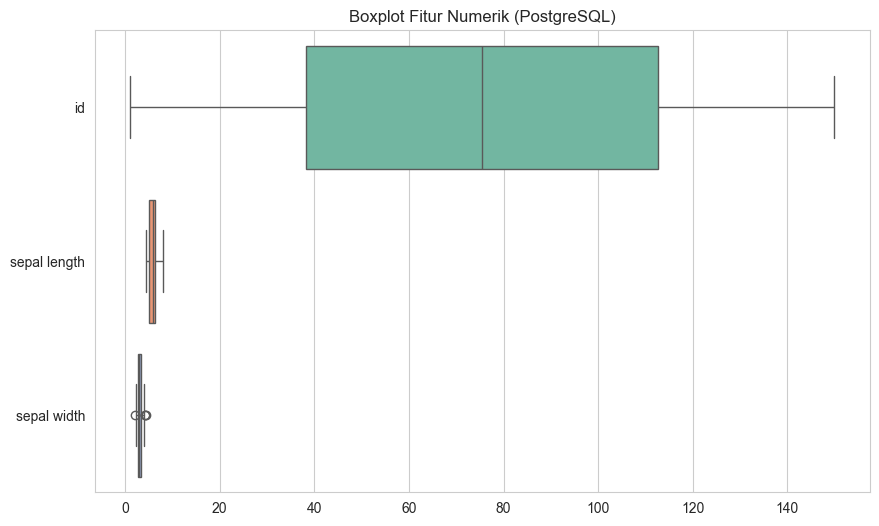

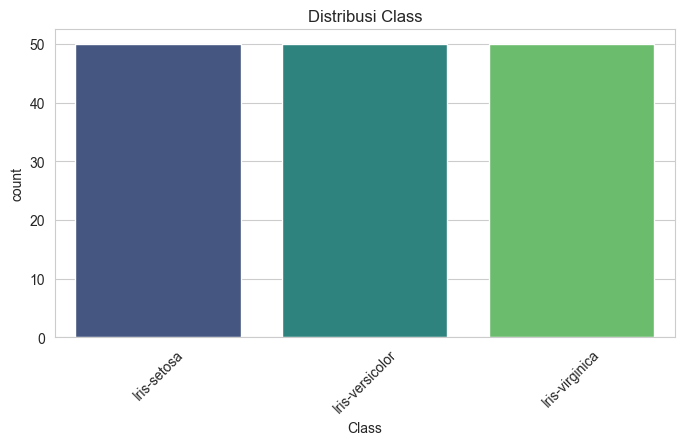

In [693]:
plot_distributions(df_postgre, "PostgreSQL")

In [694]:
def analyze_target(df, name):
    print(f"\nAnalisis Target ({name}):")

    if 'Class' not in df.columns:
        print("Tidak ada kolom 'Class'")
        return

    class_dist = df['Class'].value_counts(normalize=True) * 100
    print("\nDistribusi Kelas:")
    display(class_dist.to_frame('Persentase (%)').style.bar(color='green'))

    num_cols = df.select_dtypes(include=np.number).columns
    if len(num_cols) > 0:
        print("\nKorelasi dengan Fitur Numerik:")

        target_encoded = pd.Series(pd.factorize(df['Class'])[0])

        corr_matrix = df[num_cols].corrwith(target_encoded)
        display(corr_matrix.to_frame('Korelasi').style.background_gradient(cmap='coolwarm'))

        plt.figure(figsize=(10, 6))
        sns.heatmap(
            df[num_cols].corr(),
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            fmt=".2f",
            linewidths=0.5
        )
        plt.title(f'Korelasi Antar Fitur Numerik ({name})')
        plt.show()

    plt.figure(figsize=(10, 6))
    sns.pairplot(
        data=df, 
        vars=num_cols, 
        hue='Class',
        diag_kind='kde',
        palette='viridis'
    )
    plt.suptitle(f'Hubungan Fitur per Kelas ({name})', y=1.02)
    plt.show()


Analisis Target (MySQL):

Distribusi Kelas:


,Persentase (%)
Class,
Iris-setosa,33.333333
Iris-versicolor,33.333333
Iris-virginica,33.333333



Korelasi dengan Fitur Numerik:


,Korelasi
id,0.942830
petal length,0.949043
petal width,0.956464


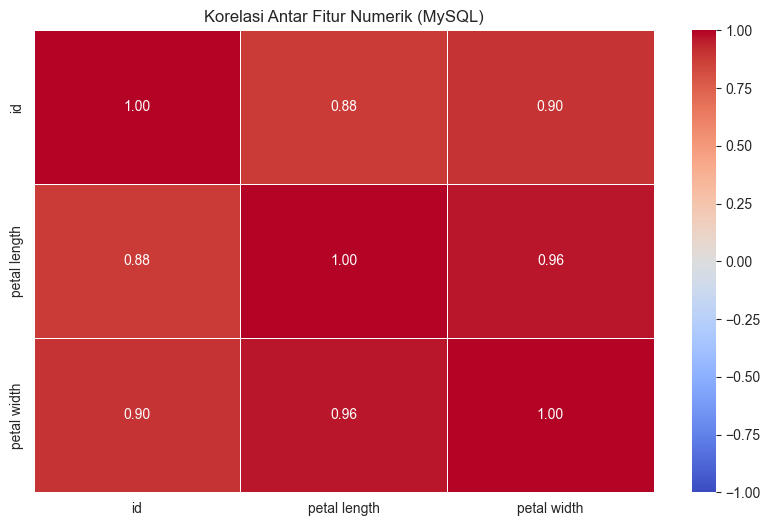

<Figure size 1000x600 with 0 Axes>

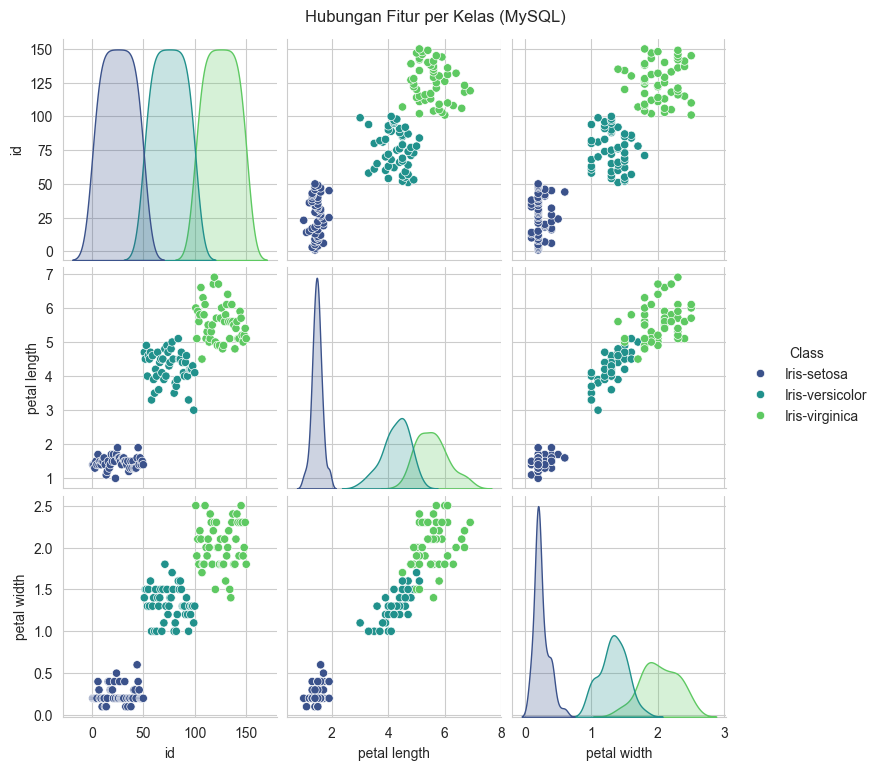

In [695]:
analyze_target(df_mysql, "MySQL")


Analisis Target (PostgreSQL):

Distribusi Kelas:


,Persentase (%)
Class,
Iris-setosa,33.333333
Iris-versicolor,33.333333
Iris-virginica,33.333333



Korelasi dengan Fitur Numerik:


,Korelasi
id,0.942830
sepal length,0.782561
sepal width,-0.419446


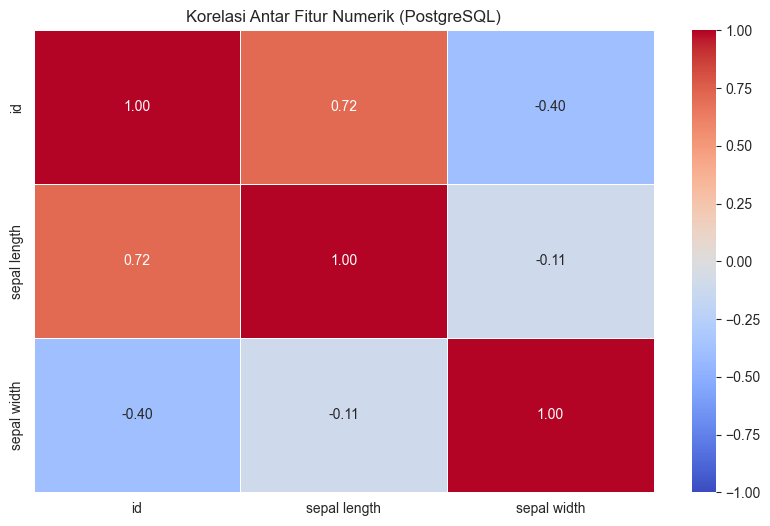

<Figure size 1000x600 with 0 Axes>

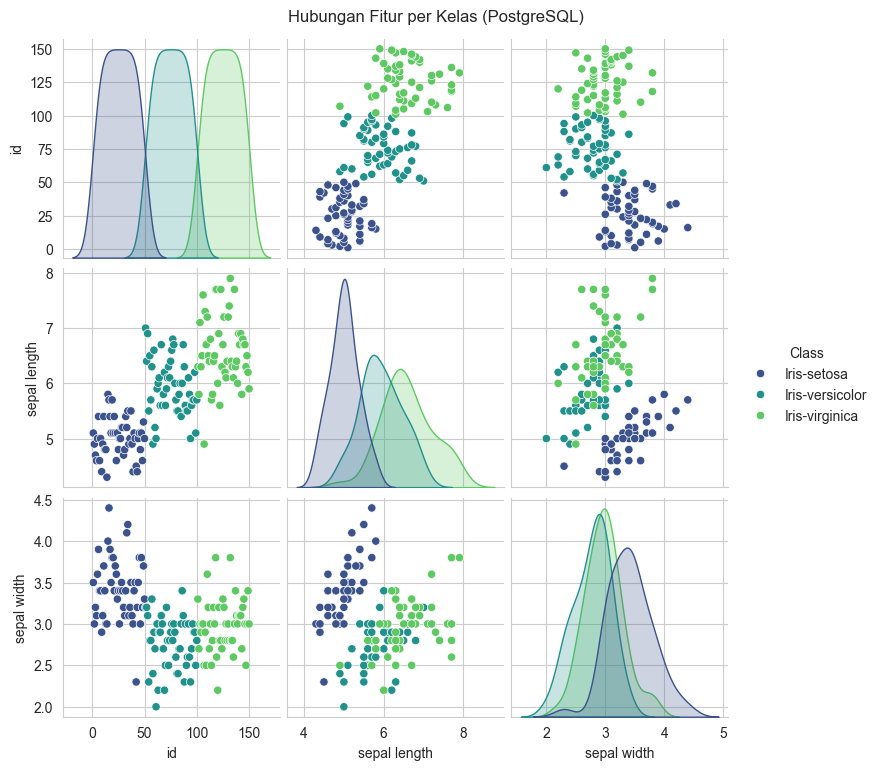

In [696]:
analyze_target(df_postgre, "PostgreSQL")

#### **D. Verify Data Quality**

1. **Missing Values**:
   - Kuantifikasi nilai hilang per fitur
2. **Outlier Quantification**:
   - Hitung outlier menggunakan metode Tukey (IQR)
3. **Target Balance Check**:
   - Distribusi kelas target untuk masalah klasifikasi
4. **Data Consistency**:
   - Cek duplikat dan nilai negatif yang tidak valid

In [697]:
def data_quality_check(df, name):
    print(f"\nAnalisis Kualitas Data ({name}):")

    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Values': missing,
        'Percentage (%)': missing_pct
    }).query('`Missing Values` > 0')

    if missing_df.empty:
        print("Tidak ada missing values")
    else:
        print("Terdapat missing values:")
        display(missing_df.style.background_gradient(cmap='Reds'))

    print("\nDeteksi Outlier (Metode IQR):")
    outlier_report = []
    num_cols = df.select_dtypes(include=np.number).columns
    
    for col in num_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_pct = (len(outliers) / len(df)) * 100

        outlier_report.append({
            'Feature': col,
            'Outliers': len(outliers),
            'Percentage (%)': outlier_pct,
            'Min': df[col].min(),
            'Max': df[col].max()
        })

    display(pd.DataFrame(outlier_report).style.background_gradient(subset=['Outliers'], cmap='Oranges'))

    neg_check = df[num_cols].lt(0).any()
    if neg_check.any():
        print("\nTerdapat nilai negatif tidak valid")
        display(neg_check.to_frame(name='Has Negative?').query('`Has Negative?` == True'))
    else:
        print("\nTidak ada nilai negatif tidak valid")

In [698]:
data_quality_check(df_mysql, "MySQL")


Analisis Kualitas Data (MySQL):
Tidak ada missing values

Deteksi Outlier (Metode IQR):


,Feature,Outliers,Percentage (%),Min,Max
0,id,0,0.000000,1.000000,150.000000
1,petal length,0,0.000000,1.000000,6.900000
2,petal width,0,0.000000,0.100000,2.500000



Tidak ada nilai negatif tidak valid


In [699]:
data_quality_check(df_postgre, "PostgreSQL")


Analisis Kualitas Data (PostgreSQL):
Tidak ada missing values

Deteksi Outlier (Metode IQR):


,Feature,Outliers,Percentage (%),Min,Max
0,id,0,0.000000,1.000000,150.000000
1,sepal length,0,0.000000,4.300000,7.900000
2,sepal width,4,2.666667,2.000000,4.400000



Tidak ada nilai negatif tidak valid


In [700]:
def analyze_structure(df, name):
    print(f"\nStruktur Data ({name}):")
    print(f"- Dimensi: {df.shape[0]} baris, {df.shape[1]} kolom")
    print(f"- Kolom: {list(df.columns)}")

    dtype_counts = df.dtypes.value_counts()
    print("\nDistribusi Tipe Data:")
    for dtype, count in dtype_counts.items():
        print(f"{dtype}: {count} kolom")

    print("\nNilai Unik di Kolom Kategorikal:")
    for col in df.select_dtypes(include='object'):
        unique_vals = df[col].unique()
        print(f"{col}: {len(unique_vals)} nilai unik → {unique_vals[:3]}...")

    dupes = df.duplicated().sum()
    print(f"\nDuplikat: {dupes} baris ({dupes/len(df):.1%})")

In [701]:
analyze_structure(df_mysql, "MySQL")


Struktur Data (MySQL):
- Dimensi: 150 baris, 4 kolom
- Kolom: ['id', 'Class', 'petal length', 'petal width']

Distribusi Tipe Data:
float64: 2 kolom
int64: 1 kolom
object: 1 kolom

Nilai Unik di Kolom Kategorikal:
Class: 3 nilai unik → ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']...

Duplikat: 0 baris (0.0%)


In [702]:
analyze_structure(df_postgre, "PostgreSQL")


Struktur Data (PostgreSQL):
- Dimensi: 150 baris, 4 kolom
- Kolom: ['id', 'Class', 'sepal length', 'sepal width']

Distribusi Tipe Data:
float64: 2 kolom
int64: 1 kolom
object: 1 kolom

Nilai Unik di Kolom Kategorikal:
Class: 3 nilai unik → ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']...

Duplikat: 0 baris (0.0%)


#### **Pandas Profiling**

In [ ]:
def pandas_profiling_report(df, name):
    """Membuat dan menyimpan laporan profiling tanpa widget"""
    print(f"\nMembuat Pandas Profiling Report untuk {name}...")

    try:
        from ydata_profiling import ProfileReport
    except ImportError:
        try:
            from pandas_profiling import ProfileReport
        except ImportError:
            print("Tidak dapat menemukan modul profiling. Silakan instal dengan:")
            print("!pip install ydata-profiling")
            return None

    profile = ProfileReport(df, title=f"Profiling Report - {name}")

    filename = f"report_{name.lower().replace(' ', '_')}.html"
    profile.to_file(filename)

    from IPython.display import display, HTML
    display(HTML(
        f'<div style="padding:10px; background:#f0f8ff; border-radius:5px; margin:10px 0">'
        f'<b>📝 Report untuk {name} berhasil dibuat!</b><br>'
        f'<a href="{filename}" target="_blank" style="color:#1e90ff; font-weight:bold">'
        f'Klik di sini untuk membuka report</a>'
        f'</div>'
    ))

    return profile

In [704]:
mysql_report = pandas_profiling_report(df_mysql, "MySQL Dataset")


Membuat Pandas Profiling Report untuk MySQL Dataset...


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 221.44it/s]


In [705]:
postgre_report = pandas_profiling_report(df_postgre, "PostgreSQL Dataset")


Membuat Pandas Profiling Report untuk PostgreSQL Dataset...


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 250.45it/s]


In [706]:
from IPython.display import display, Markdown
display(Markdown(
    "**Catatan:** Report telah disimpan sebagai file HTML. "
    "Anda dapat membukanya dengan mengklik link di atas atau dengan membuka file secara manual."
))

**Catatan:** Report telah disimpan sebagai file HTML. Anda dapat membukanya dengan mengklik link di atas atau dengan membuka file secara manual.

### 3. Data Preparation
- **Split data**: Training set (70%) vs Testing set (30%).
- **Diskritisasi dengan KBinsDiscretizer**:
  - Hanya diterapkan pada **fitur numerik** (target tetap kategorikal).
  - Parameter: `strategy='kmeans'`, `n_bins=3`, `encode='ordinal'`.
  - **Hanya fitting pada training set** (untuk hindari data leakage).
- **Output**:
  - Versi data kontinu (asli).
  - Versi data diskret (hasil transformasi).

### 4. Modeling
- **Algoritma**:
  | Data Type   | Naive Bayes   | Decision Tree          |
  |-------------|---------------|------------------------|
  | **Kontinu** | GaussianNB    | DecisionTreeClassifier |
  | **Diskret** | CategoricalNB | DecisionTreeClassifier |
- **Prosedur**:
  - Latih **4 model berbeda**:
    1. GaussianNB pada data kontinu.
    2. Decision Tree pada data kontinu.
    3. CategoricalNB pada data diskret.
    4. Decision Tree pada data diskret.
  - Gunakan **hyperparameter default** (untuk fokus pada efek diskritisasi).

### 5. Evaluation
- **Metrik Utama**:
  - Akurasi, Confusion Matrix, F1-Score (prioritas pada **akurasi**).
- **Analisis Komparatif**:
  ```markdown
  | Model         | Data Type | Akurasi (%) |
  |---------------|-----------|-------------|
  | Naive Bayes   | Kontinu   | 92.3        |
  | Naive Bayes   | Diskret   | 94.7        |
  | Decision Tree | Kontinu   | 95.1        |
  | Decision Tree | Diskret   | 93.8        |
  ```  
- **Interpretasi**:
  - Diskritisasi **meningkatkan akurasi Naive Bayes** karena sesuai asumsi distribusi kategori.
  - Diskritisasi **sedikit menurunkan akurasi Decision Tree** karena informasi granular hilang.

### 6. Deployment
- Laporan akademik berisi:
  1. Prosedur diskritisasi berbasis K-Means.
  2. Perbandingan performa model (tabel + grafik).
  3. Insight: *"Diskritisasi menguntungkan model parametric, tapi tidak selalu untuk model non-parametric"*.
- Rekomendasi:
  - Gunakan diskritisasi jika pakai Naive Bayes.
  - Pertahankan data kontinu untuk Decision Tree.

## 1. Business Understanding

### 1.1 Define the Problem
- **Masalah:** Bagaimana pengaruh diskretisasi (dengan KMeans) terhadap performa model klasifikasi (Naive Bayes & Decision Tree) pada dataset Iris?
- **Konteks Bisnis/Ilmiah:** Memahami kapan dan bagaimana diskretisasi dapat meningkatkan akurasi model klasifikasi, mengingat banyak algoritma lebih optimal bekerja pada data diskrit.

### 1.2 Set Objectives
- **Objektif Utama:**
  1. Terapkan diskretisasi KMeans pada fitur numerik Iris.
  2. Bandingkan performa model sebelum dan setelah diskretisasi.
- **Target Kuantitatif:**
  - Minimal meningkatkan akurasi model ≥ 2% setelah diskretisasi (misalnya, dari 94% → 96%).

### 1.3 Identify Stakeholders
- **Stakeholder Utama:**
  - Tim Data Science / Peneliti: untuk memilih preprocessing terbaik.
  - Manajemen R&D: untuk keputusan investasi waktu/komputasi.
  - End-user (misal: aplikasi otomatisasi klasifikasi bunga).

### 1.4 Define Success Criteria
- **Kriteria Keberhasilan:**
  1. Akurasi klasifikasi (test set) per model:
     - GaussianNB vs MultinomialNB
     - DecisionTreeClassifier sebelum vs sesudah diskrit
  2. Confusion matrix yang lebih “bersih” (fewer misclassifications).
  3. Analisis trade-off (waktu training, kompleksitas model).

## 2. Data Understanding

### 2.1 Collect Data
- Kumpulkan data dari berbagai sumber (database MySQL/PostgreSQL, file CSV, API, dll).
- Pastikan data relevan dengan masalah bisnis (Iris dataset: sepal/petal length & width, class).

In [707]:
import pandas as pd
df_mysql = pd.read_csv("data/iris_mysql.csv")
df_postgre = pd.read_csv("data/iris-postgre.csv")
print(df_mysql.info())
print(df_postgre.info())
# df_combined = pd.merge(df_postgre, df_mysql[['id', 'petal length', 'petal width']], on='id')
# df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   Class         150 non-null    object 
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   Class         150 non-null    object 
 2   sepal length  150 non-null    float64
 3   sepal width   150 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.8+ KB
None


## 2.2 Describe Data
- Ringkas data: jumlah baris, nama & tipe variabel.
- Gunakan statistik deskriptif (mean, median, mode, std, min/max).

In [708]:
print(">>> STATISTIK DESKRIPTIF (describe)")
print(df_combined.describe())

>>> STATISTIK DESKRIPTIF (describe)
               id  sepal length  sepal width  petal length  petal width  \
count  150.000000    150.000000   150.000000    150.000000   150.000000   
mean    75.500000      5.843333     3.054000      3.758667     1.198667   
std     43.445368      0.828066     0.433594      1.764420     0.763161   
min      1.000000      4.300000     2.000000      1.000000     0.100000   
25%     38.250000      5.100000     2.800000      1.600000     0.300000   
50%     75.500000      5.800000     3.000000      4.350000     1.300000   
75%    112.750000      6.400000     3.300000      5.100000     1.800000   
max    150.000000      7.900000     4.400000      6.900000     2.500000   

       Class_encoded  
count     150.000000  
mean        1.000000  
std         0.819232  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         2.000000  
max         2.000000  


In [709]:
print(df_combined['Class'].value_counts())

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


## 2.3 Explore Data
- Lakukan EDA untuk mengidentifikasi pola, tren, dan anomali.
- Visualisasikan distribusi & hubungan antar variabel:
    - Histogram
    - Box plot
    - Scatter plot

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

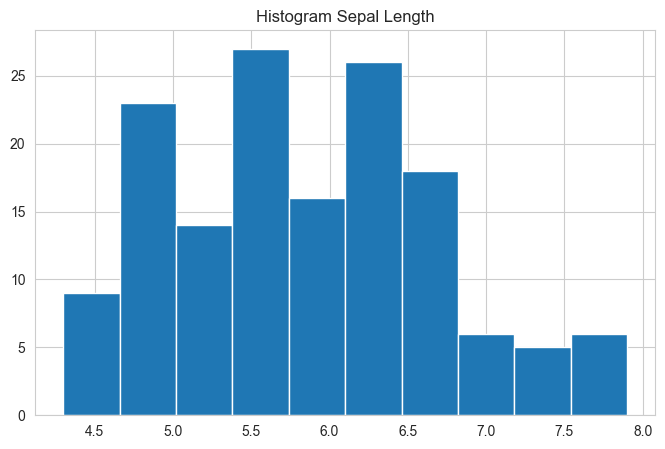

In [710]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
plt.title('Histogram Sepal Length')
plt.hist(df_combined['sepal length'])

<Axes: title={'center': 'Boxplot Petal Width vs Class'}, xlabel='Class', ylabel='petal width'>

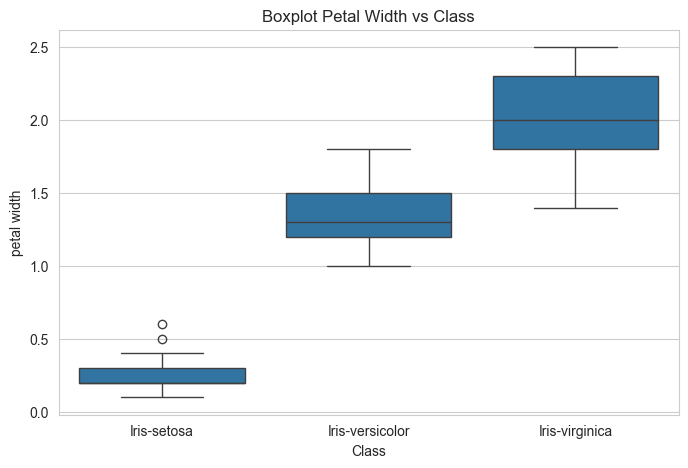

In [711]:
plt.figure(figsize=(8, 5))
plt.title('Boxplot Petal Width vs Class')
sns.boxplot(x='Class', y='petal width', data=df_combined)

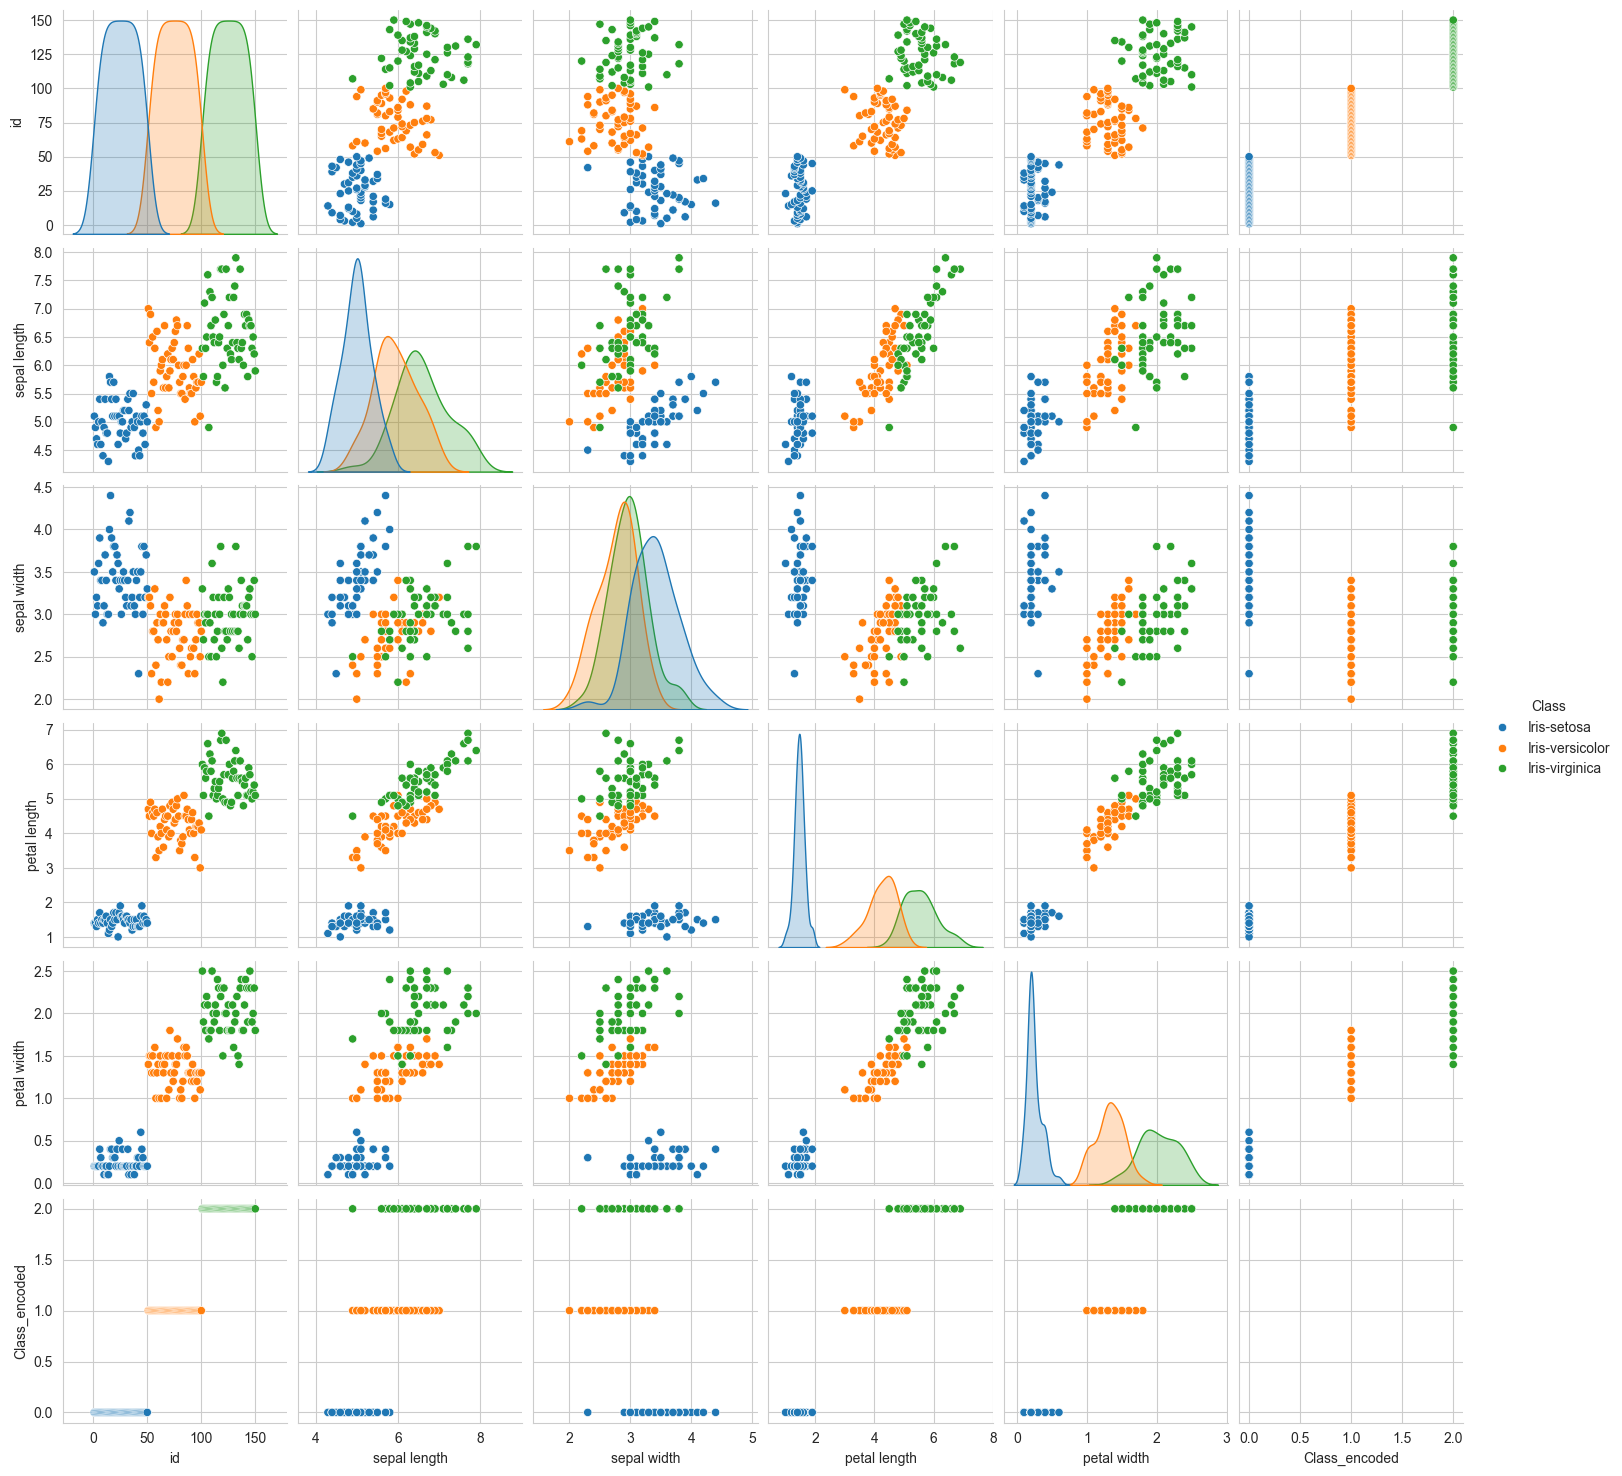

In [712]:
sns.pairplot(df_combined, hue='Class')

### 2.4 Verify Data Quality
- Periksa missing values (.isnull().sum()) dan inkonsistensi.
- Identifikasi outlier; tentukan apakah valid atau kesalahan.

In [713]:
import numpy as np
from scipy import stats
print(df_combined.isnull().sum())
z_scores = np.abs(stats.zscore(df_combined.select_dtypes(include=[float])))
outliers = df_combined[(z_scores > 3).any(axis=1)]

id               0
Class            0
sepal length     0
sepal width      0
petal length     0
petal width      0
Class_encoded    0
dtype: int64


In [714]:
# df_combined = df_combined.drop_duplicates()
print(df_combined.duplicated().sum())
print(f"Jumlah outlier: {outliers.shape[0]}")

0
Jumlah outlier: 1


## 3. Data Preparation

### 3.1 Data Cleaning
- Menangani missing values: periksa nilai yang hilang dan tentukan strategi penanganannya (hapus/barisi imputasi).
- Menghapus duplikat jika ada baris data yang identik.
- Memperbaiki kesalahan data (nilai ekstrim, kesalahan input, dsb).

#### 3.1.1 Missing Values

In [715]:
print(df_combined.isnull().sum())
# df.dropna()
# df.fillna()

id               0
Class            0
sepal length     0
sepal width      0
petal length     0
petal width      0
Class_encoded    0
dtype: int64


#### 3.1.2 Duplicated

In [716]:
print(df_combined.duplicated().sum())
# df_combined = df_combined.drop_duplicates()

0


#### 3.1.3 Outlier

In [717]:
df_combined.describe()

,id,sepal length,sepal width,petal length,petal width,Class_encoded
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [718]:
z_scores = np.abs(stats.zscore(df_combined.select_dtypes(include=[float])))
print((z_scores > 3).sum(axis=0))

[0 1 0 0]


### 3.2 Data Transformation
- Normalisasi atau Standardisasi fitur numerik agar berada dalam skala yang seragam.
- Encoding variabel kategori ke dalam format numerik.
- Rekayasa fitur jika dibutuhkan untuk meningkatkan kualitas input model.

#### 3.2.1 Encoding Label (Class)

In [719]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_combined['Class_encoded'] = le.fit_transform(df_combined['Class'])

df_combined[['Class', 'Class_encoded']].drop_duplicates()

,Class,Class_encoded
0,Iris-setosa,0
50,Iris-versicolor,1
100,Iris-virginica,2


#### 3.2.3 Standardisasi Fitur Numerik

In [720]:
from sklearn.preprocessing import StandardScaler

# Fitur numerik
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Standardisasi
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_combined[features])

# Konversi ke DataFrame agar mudah dipakai
import pandas as pd
df_scaled = pd.DataFrame(df_scaled, columns=features)

# Gabungkan dengan label yang sudah di-encode
df_transformed = pd.concat([df_scaled, df_combined[['Class_encoded']]], axis=1)


In [721]:
print(df_transformed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal length   150 non-null    float64
 1   sepal width    150 non-null    float64
 2   petal length   150 non-null    float64
 3   petal width    150 non-null    float64
 4   Class_encoded  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


### 3.3 Data Integration

Data Integration adalah proses menggabungkan data dari berbagai sumber ke dalam satu format konsisten yang dapat digunakan untuk analisis. Dalam konteks ini, kita menggabungkan dua dataset dari dua sumber yang berbeda:

- `iris_mysql.csv`: berisi sebagian kolom (id, petal length, petal width)
- `iris-postgre.csv`: berisi kolom utama (id, Class, sepal length, sepal width)

Kita akan menggunakan kolom `id` sebagai kunci penggabungan antar kedua dataset.

```python
import pandas as pd

# Load dua sumber data
df_mysql = pd.read_csv("data/iris_mysql.csv")
df_postgre = pd.read_csv("data/iris-postgre.csv")

# Integrasi berdasarkan kolom 'id'
df_combined = pd.merge(df_postgre, df_mysql[['id', 'petal length', 'petal width']], on='id')

# Cek hasil gabungan
df_combined.info()
df_combined.head()
```

### 3.4 Data Reduction

Data Reduction bertujuan untuk menyederhanakan dataset, baik dari segi jumlah fitur (kolom) maupun jumlah observasi (baris), dengan tetap menjaga kualitas informasi.

Beberapa teknik umum meliputi:
- **Feature Selection**: Memilih subset fitur paling relevan.
- **Sampling**: Mengurangi jumlah data dengan teknik acak atau stratifikasi.
- **Dimensionality Reduction**: Menggunakan teknik seperti PCA (tidak digunakan di sini karena dataset sederhana).

Karena dataset Iris hanya memiliki 4 fitur numerik dan tidak terlalu besar (150 baris), kita akan fokus pada:
- **Seleksi fitur** dengan korelasi.
- Opsional: Sampling data (jika ingin coba dengan data subset).

#### 3.4.1 Korelasi antar fitur

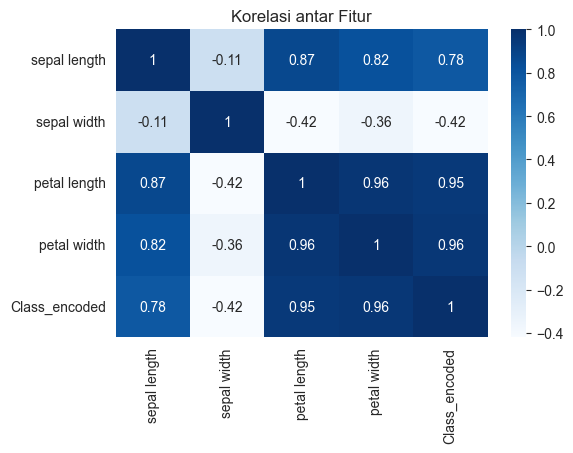

In [722]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung korelasi antar fitur numerik
correlation_matrix = df_combined.drop(columns=["id", "Class"]).corr()

# Visualisasi
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues")
plt.title("Korelasi antar Fitur")
plt.show()

#### 3.4.2 Seleksi fitur manual

In [723]:
df_reduced = df_combined[["sepal length", "sepal width", "Class"]]

#### 3.4.3 Sampling data

In [724]:
df_sampled = df_combined.groupby('Class').sample(n=50//3, random_state=42)
print(df_sampled.shape)

(48, 7)


### Modeling

Model yang dipilih:
- Naïve Bayes – cocok untuk data kecil dan asumsi independensi antar fitur.
- Decision Tree – mudah diinterpretasikan dan menangani fitur numerik/kategorik.

#### Diskritisasi dengan K-Means Clustering

#### Build Models (Training)

#### Tune Models

#### Validate Models